# <h1 align=center> **EDA ML-OPS** </h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings

In [4]:
# Suprimir todos los warnings
warnings.filterwarnings("ignore")

In [5]:
# Cargar los DataFrames desde los archivos parquet
games=pd.read_parquet("games.parquet")
items=pd.read_parquet("items.parquet")
reviews=pd.read_parquet("reviews.parquet")

In [6]:
# Hace el merge entre los DataFrames games y reviews utilizando la columna 'id' como clave
merged_df = pd.merge(games, reviews, on='item_id')

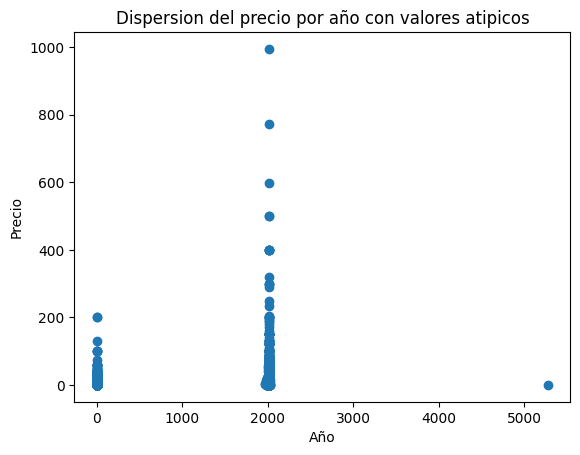

In [20]:
# Gráfico de dispersión para ver la relación entre año y precio
plt.scatter(games['año_lanzamiento'], games['price'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Dispersion del precio por año con valores atipicos')
plt.show()

Observamos las estadísticas descriptivas para la columna precio

In [21]:
games['año_lanzamiento'].describe()

count    32133.00000
mean      1878.99860
std        505.63735
min          0.00000
25%       2014.00000
50%       2016.00000
75%       2017.00000
max       5275.00000
Name: año_lanzamiento, dtype: float64

Identificamos outlaiers en la columna precio y los eliminamos 

In [22]:
# Calcula el primer y tercer cuartil de price
Q1 = games['price'].quantile(0.25)
Q3 = games['price'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Elimina filas con outliers en price
df_games = games[(games['price'] >= lower_bound) & (games['price'] <= upper_bound)]

In [23]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30259 entries, 0 to 32132
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   30259 non-null  object 
 1   tags                       30259 non-null  object 
 2   price                      30259 non-null  float64
 3   item_id                    30259 non-null  int64  
 4   developer                  30259 non-null  object 
 5   año_lanzamiento            30259 non-null  int64  
 6   Accounting                 30259 non-null  int64  
 7   Action                     30259 non-null  int64  
 8   Adventure                  30259 non-null  int64  
 9   Animation &amp; Modeling   30259 non-null  int64  
 10  Audio Production           30259 non-null  int64  
 11  Casual                     30259 non-null  int64  
 12  Design &amp; Illustration  30259 non-null  int64  
 13  Early Access               30259 non-null  int

In [24]:
#Informaremos los juegos con mayor tiempo jugado
top_juegos_jugados = items.sort_values(by='playtime_forever', ascending=False).head(10)

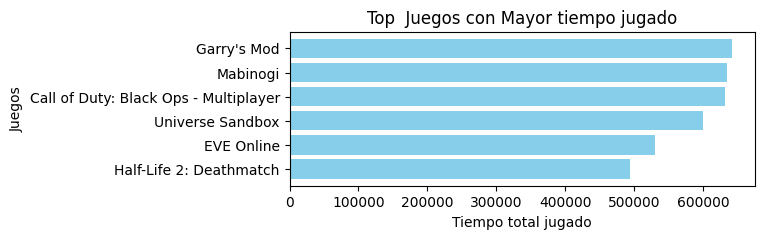

In [25]:
plt.figure(figsize=(6, 2))  # Ajusta el tamaño del gráfico..

# Graficar los datos
plt.barh(top_juegos_jugados['item_name'], top_juegos_jugados['playtime_forever'], color='skyblue')
plt.xlabel('Tiempo total jugado')  # Etiqueta del eje X
plt.ylabel('Juegos')         # Etiqueta del eje Y
plt.title('Top  Juegos con Mayor tiempo jugado')  # Título del gráfico

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.

# Mostrar el gráfico
plt.show()

In [26]:
# Convierte las columnas a tipo int32
genres_list = ['Accounting','Action', 'Adventure', 'Animation &amp; Modeling','Casual','Design &amp; Illustration', 'Early Access','Education','Free to Play', 'Indie', 'Massively Multiplayer','Photo Editing', 'RPG', 'Racing', 'Simulation','Software Training', 'Sports', 'Strategy','Utilities', 'Video Production', 'Web Publishing']
for i in genres_list:
    df_games[i] = df_games[i].astype('int32')

In [28]:
# Define una funcion de conteo
def frequency_counter(df, lista):
    aux_list = []
    for i in lista:
        aux_list.append((i, round((len(df.loc[df[i] == 1])), 2)))
    aux_list = dict(aux_list)
    counter_aux_list = Counter(aux_list)
    return counter_aux_list

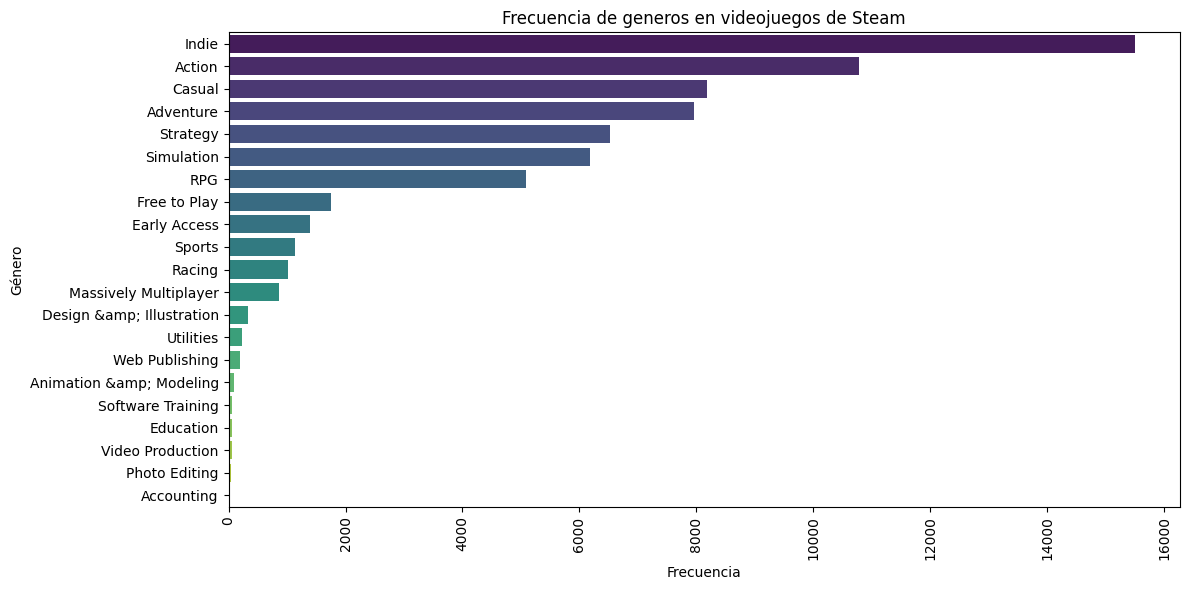

In [29]:
# Crea y ordena el DataFrame por los valores de frecuencia en orden descendente
counter_aux_list_2 = frequency_counter(df_games, genres_list)
datos = counter_aux_list_2
datos = pd.DataFrame.from_dict(datos, orient='index', columns=['Frecuencia'])
datos = datos.sort_values(by='Frecuencia', ascending=False)
# Crea el gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y=datos.index, data=datos, palette='viridis')

# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de generos en videojuegos de Steam')

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [30]:
# Conviertimos los valores booleanos de recommend a valores numéricos
reviews['recommend'] = reviews['recommend'].astype(int)

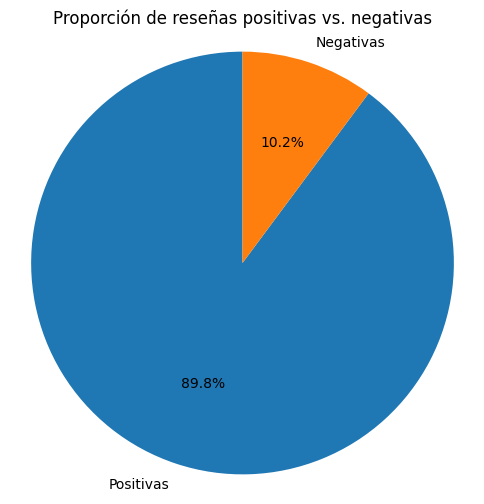

In [31]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico.

# Contar el número de reseñas positivas y negativas
num_positivas = len(reviews[reviews['recommend'] == 1])
num_negativas = len(reviews[reviews['recommend'] == 0])

# Graficar los datos
plt.pie([num_positivas, num_negativas], labels=['Positivas', 'Negativas'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ajustar el aspecto del gráfico para que sea un círculo.
plt.title('Proporción de reseñas positivas vs. negativas')  # Título del gráfico

# Mostrar el gráfico
plt.show()

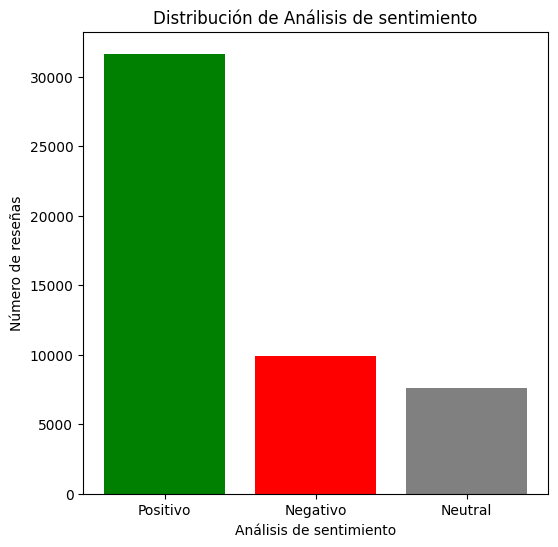

In [32]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico.

# Contar el número de reseñas positivas, negativas y neutrales
num_positivas = len(reviews[reviews['sentiment_analysis'] == 2])
num_negativas = len(reviews[reviews['sentiment_analysis'] == 1])
num_neutrales = len(reviews[reviews['sentiment_analysis'] == 0])

# Graficar los datos
plt.bar(['Positivo', 'Negativo', 'Neutral'], [num_positivas, num_negativas, num_neutrales], color=['green', 'red', 'gray'])
plt.xlabel('Análisis de sentimiento')  # Etiqueta del eje X
plt.ylabel('Número de reseñas')  # Etiqueta del eje Y
plt.title('Distribución de Análisis de sentimiento')  # Título del gráfico

# Mostrar el gráfico
plt.show()